## PREVISÃO DE VENDAS - Adventure Works

<div class="alert alert-block alert-warning">
<b>Sobre o conteúdo:</b> Este é um projeto pessoal do estudo previsões de séries temporais. <br>
<b>Objetivo:</b> Prever as vendas da Adventure Works para balizar o planejamento a fim de ter inventário saudável (empresa fictícia da Microsoft)
</div>

### Etapas do projeto

>1) Importar bibliotecas necessárias para utilização <br>
>2) Importar dados para a análise: neste caso, estão no SQL Server instalado em meu computador local <br>
>3) Buscar a quantidade de vendas e respectivas datas.
>4) Identificar parâmetro de correlação de regressão.
>5) Treinar o modelo de regressão.
>6) Calcular a previsão e medir a acurácia do modelo.


In [5]:
#Importando as bibliotecas necessárias
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# conectando ao servidor para buscar histórico de vendas
connectiondata = (
    "Driver={SQL Server};"
    "Server=localhost\SQLEXPRESS;"
    "Database=AdventureWorks2019;"
    "Trusted_Connection=yes;")
## adicionando login e senha opcionais ; UID=nomeusuario;PWD=senhadousuario
connection = pyodbc.connect(connectiondata)
cursor = connection.cursor()

In [6]:
query = "SELECT convert(DATE,sh.OrderDate) as DataVenda, PP.Name as 'Produto', FORMAT(sd.OrderQty,'N0') as 'Qtd', FORMAT(sd.LineTotal,'N2') as 'ValorNF' FROM sales.SalesOrderDetail SD INNER JOIN Sales.SalesOrderHeader SH ON SH.SalesOrderID = SD.SalesOrderID INNER JOIN Production.Product PP ON PP.ProductID = SD.ProductID"
cursor.execute(query)

In [7]:
connection = pyodbc.connect(connectiondata)
cursor = connection.cursor()
df_raw = pd.read_sql(query,connection,parse_dates={'DataVenda': {'format': '%Y-%m-%d'}})
result = df_raw.dtypes
print(result)

DataVenda    datetime64[ns]
Produto              object
Qtd                  object
ValorNF              object
dtype: object


In [27]:
print(df_raw)
df = pd.DataFrame(df_raw)

        DataVenda                  Produto Qtd   ValorNF
0      2011-05-31   Mountain-100 Black, 42   1  2.024,99
1      2011-05-31   Mountain-100 Black, 44   3  6.074,98
2      2011-05-31   Mountain-100 Black, 48   1  2.024,99
3      2011-05-31  Mountain-100 Silver, 38   1  2.039,99
4      2011-05-31  Mountain-100 Silver, 42   1  2.039,99
...           ...                      ...  ..       ...
121312 2014-06-30    Fender Set - Mountain   1     21,98
121313 2014-06-30             AWC Logo Cap   1      8,99
121314 2014-06-30    Fender Set - Mountain   1     21,98
121315 2014-06-30   All-Purpose Bike Stand   1    159,00
121316 2014-06-30             AWC Logo Cap   1      8,99

[121317 rows x 4 columns]


In [28]:
print(df)
print (type(df))

        DataVenda                  Produto Qtd   ValorNF
0      2011-05-31   Mountain-100 Black, 42   1  2.024,99
1      2011-05-31   Mountain-100 Black, 44   3  6.074,98
2      2011-05-31   Mountain-100 Black, 48   1  2.024,99
3      2011-05-31  Mountain-100 Silver, 38   1  2.039,99
4      2011-05-31  Mountain-100 Silver, 42   1  2.039,99
...           ...                      ...  ..       ...
121312 2014-06-30    Fender Set - Mountain   1     21,98
121313 2014-06-30             AWC Logo Cap   1      8,99
121314 2014-06-30    Fender Set - Mountain   1     21,98
121315 2014-06-30   All-Purpose Bike Stand   1    159,00
121316 2014-06-30             AWC Logo Cap   1      8,99

[121317 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [29]:
series_value = df.Qtd

In [30]:
type(series_value)

pandas.core.series.Series

In [31]:
df.set_index('DataVenda', inplace=True)

In [32]:
series_value = df.Qtd
df = df['Qtd'].astype(str).astype(int)
df.head()

DataVenda
2011-05-31    1
2011-05-31    3
2011-05-31    1
2011-05-31    1
2011-05-31    1
Name: Qtd, dtype: int32

In [33]:
df.describe()

count    121317.000000
mean          2.266080
std           2.491323
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          44.000000
Name: Qtd, dtype: float64

<AxesSubplot:xlabel='DataVenda'>

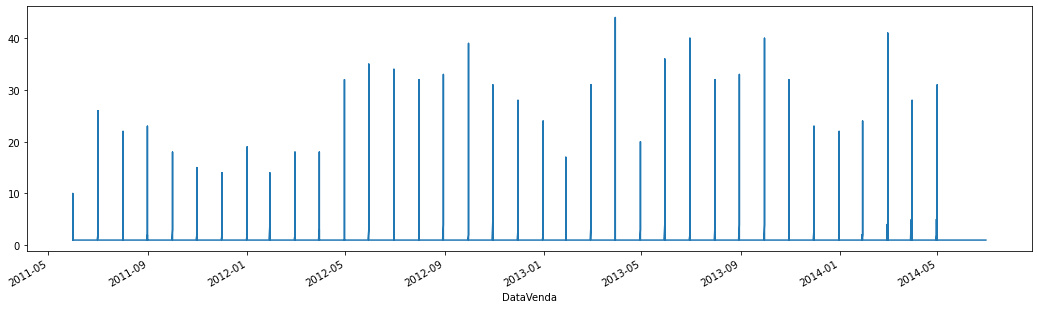

In [34]:
df.plot(figsize=(18,5))

In [66]:
#adicionando em médias móveis de 10 dias para reduzir granularidade
df_mean = df.rolling(window = 10).mean()

<AxesSubplot:xlabel='DataVenda'>

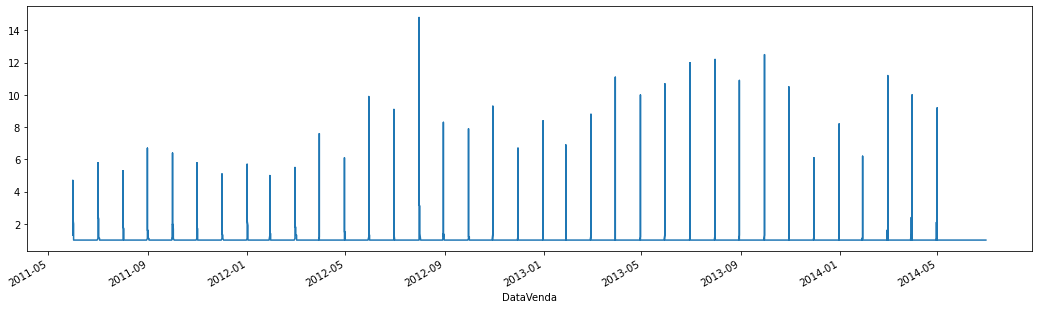

In [67]:
df_mean.plot(figsize=(18,5))

In [68]:
#criando a linha base de referencia
value=pd.DataFrame(series_value)
venda_df = pd.concat([value,value.shift(1)], axis=1)

In [69]:
venda_df.head()

,Qtd,Qtd
DataVenda,,
2011-05-31,1,NaN
2011-05-31,3,1
2011-05-31,1,3
2011-05-31,1,1
2011-05-31,1,1


In [70]:
#renomeando as colunas
venda_df.columns=['Venda_real','Venda_previsao']
#removendo a 1a linha do df, pois contém NaN
venda_df = fat_df[1:]
venda_df.head()

,Venda_real,Venda_previsao
DataVenda,,
2011-05-31,1,1
2011-05-31,1,1
2011-05-31,2,1
2011-05-31,1,2
2011-05-31,3,1


In [71]:
venda_df_error = mean_squared_error(venda_df.Venda_real,venda_df.Venda_previsao)

In [72]:
np.sqrt(venda_df_error)

2.785800987589883

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

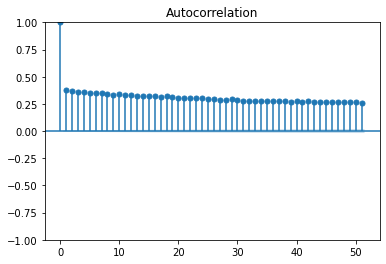

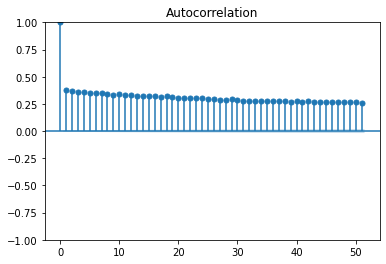

In [74]:
plot_acf (df)

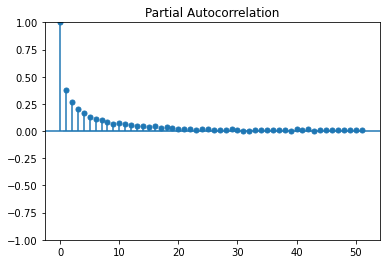

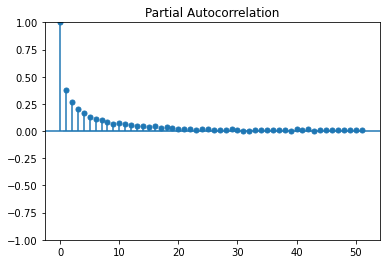

In [75]:
plot_pacf(df) #to identify the value of P 

In [76]:
df.size

121317

In [77]:
df_train = df[0:97000]
df_test = df[97000:121317]
df_train.size

97000

In [78]:
df_test.size

24317

In [79]:
import statsmodels.api as sm

In [80]:
model = sm.tsa.arima.ARIMA(df_train, order=(2,1,2))
fit = model.fit()

C:\Users\leand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\leand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\leand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [81]:
fit.aic

428434.68160362984

In [85]:
forecast = fit.forecast(steps=10)

C:\Users\leand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [89]:
df_test.head()

DataVenda
2014-03-01     6
2014-03-01    10
2014-03-01     3
2014-03-01    13
2014-03-01     8
Name: Qtd, dtype: int32